# Plot Scores for Columns of MSA

## Import and Clean Data

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

in_fh = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR30560\P0A850_ortholog_msa_scores.data"

df = pd.read_csv(in_fh)

In [3]:
# remove columns with no information
df_clean = df[df.Identity != 'X']

print(len(df_clean), "columns used in analysis.\n")

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes

119 columns used in analysis.



c:\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Identity                  object
Percent Identity         float64
Avg Blosum62 Score       float64
Avg Frequency Score      float64
Fraction Aligned         float64
Fraction Disordered      float64
Avg Disorder Strength    float64
Avg Frequency Ratio      float64
dtype: object

## Distributions of Each Score

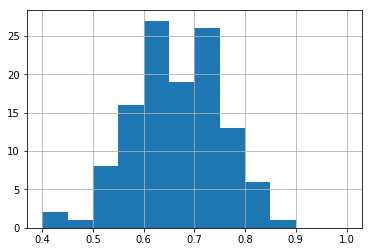

In [14]:
df_clean['Avg Frequency Score'].hist(bins = np.arange(0.4, 1.01, 0.05));

no column where, on avg, codon freq is lower than expected

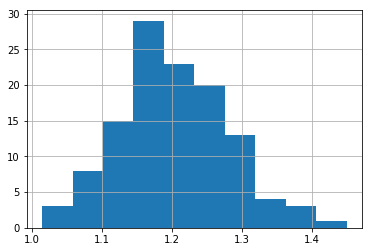

In [19]:
df_clean['Avg Frequency Ratio'].hist();

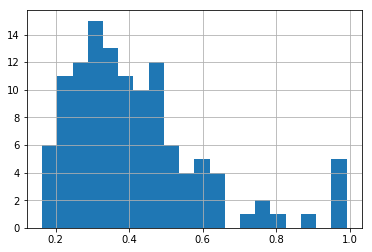

In [32]:
df_clean['Percent Identity'].hist(bins = 20);

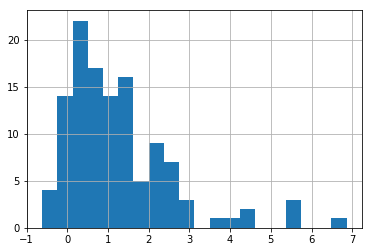

In [17]:
df_clean['Avg Blosum62 Score'].hist(bins = 20);

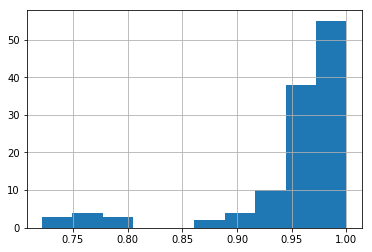

In [15]:
df_clean['Fraction Aligned'].hist();

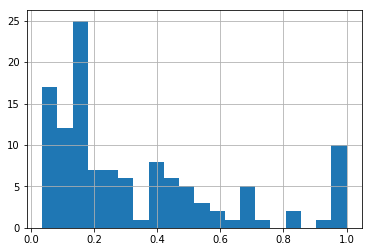

In [55]:
df_clean['Fraction Disordered'].hist(bins = 20);

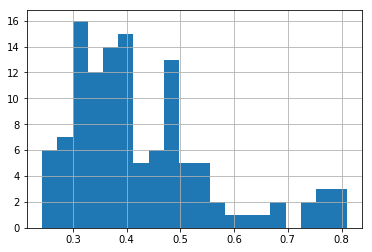

In [56]:
df_clean['Avg Disorder Strength'].hist(bins = 20);

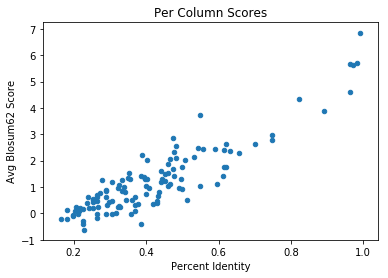

In [62]:
df_clean.plot.scatter('Percent Identity', 'Avg Blosum62 Score', title='Per Column Scores');

## Plot Column Scores

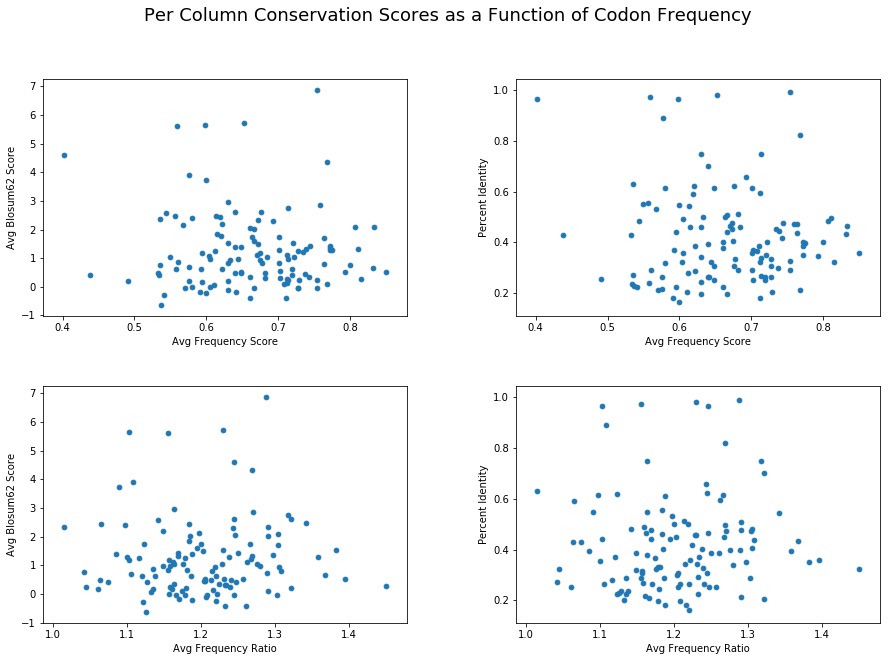

In [40]:
# each array is a row; figsize=(width,height)
fig, ([ax1,ax2], [ax3,ax4]) = plt.subplots(2, 2, sharex='row', figsize=(15,10), subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)


ax1.scatter(df_clean['Avg Frequency Score'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set_ylabel('Avg Blosum62 Score')

ax2.scatter(df_clean['Avg Frequency Score'], df_clean['Percent Identity'], s=22)
ax2.set_ylabel('Percent Identity')

ax3.scatter(df_clean['Avg Frequency Ratio'], df_clean['Avg Blosum62 Score'], s=22)
ax3.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score')

ax4.scatter(df_clean['Avg Frequency Ratio'], df_clean['Percent Identity'], s=22)
ax4.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity')

fig.subplots_adjust(hspace=0.3, wspace=0.3);


What differences are observed between the three different frequency scores used?

Fraction Disorder Split at 50% for same scores above

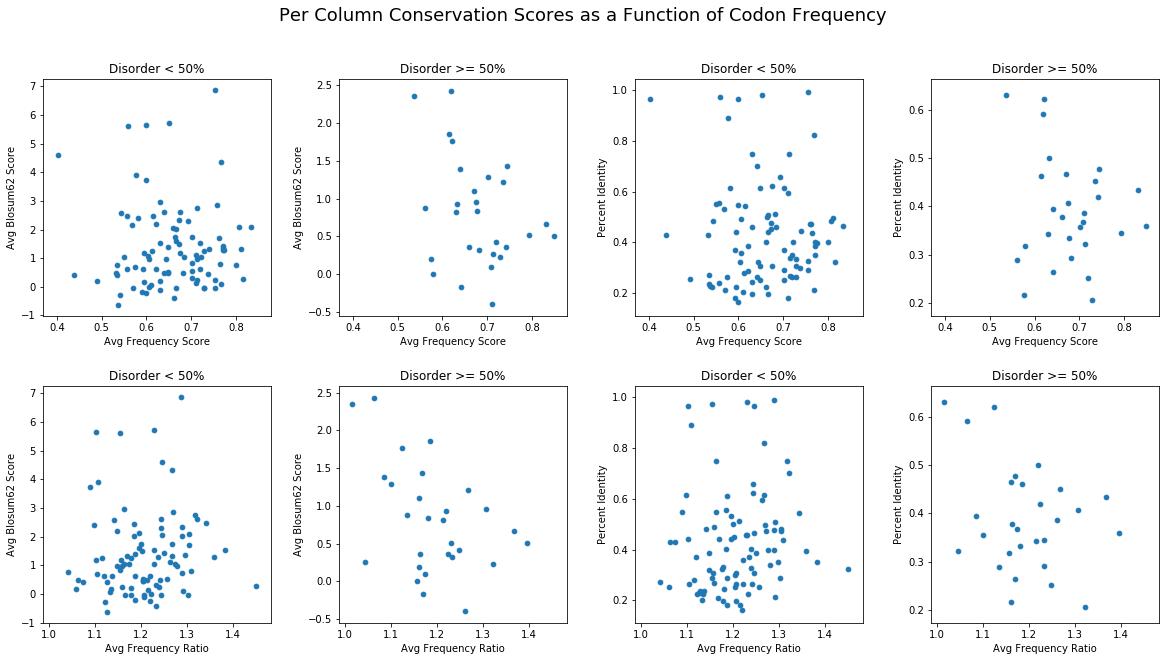

In [105]:
# make 2 subplots share yaxis? get all blossum share and all pecent id share?
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8]) = plt.subplots(2, 4, sharex='row', figsize=(20,10), 
                                                           subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

# freq score
ax1.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

#ax2 = plt.subplot(2,4,(2,2))

ax2.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax3.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# freq ratio
ax5.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax5.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax6.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax7.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax7.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax8.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder >= 50%')


# log odds here

fig.subplots_adjust(hspace=0.3, wspace=0.3)



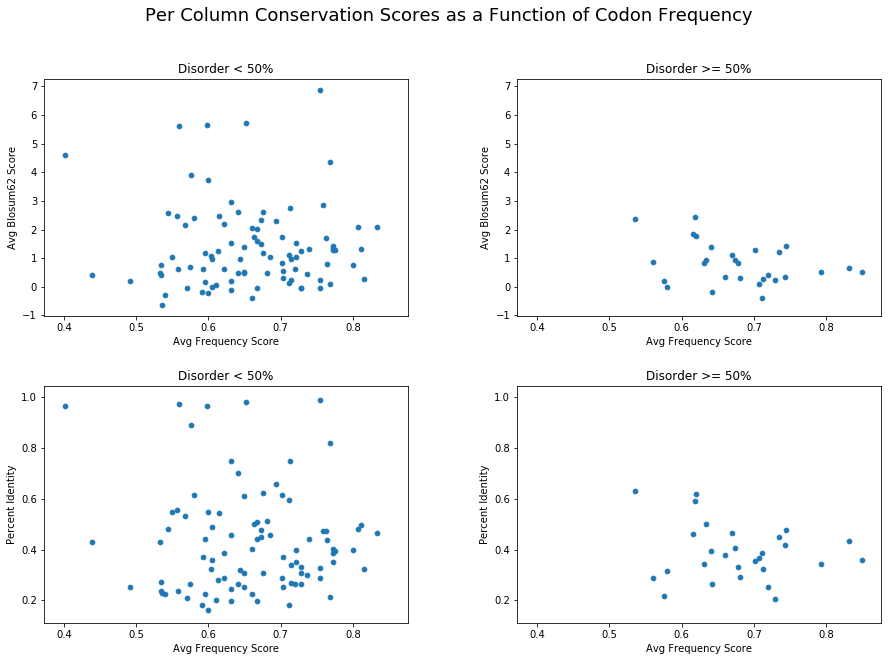

In [84]:
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

fig, ([ax1,ax2], [ax3,ax4]) = plt.subplots(2, 2, sharex=True, sharey ='row', figsize=(15,10), 
                                           subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

# freq score
ax1.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


ax3.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# turn on axis tick labels even though axis is shared
for ax in fig.axes:
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)

fig.subplots_adjust(hspace=0.3, wspace=0.3);


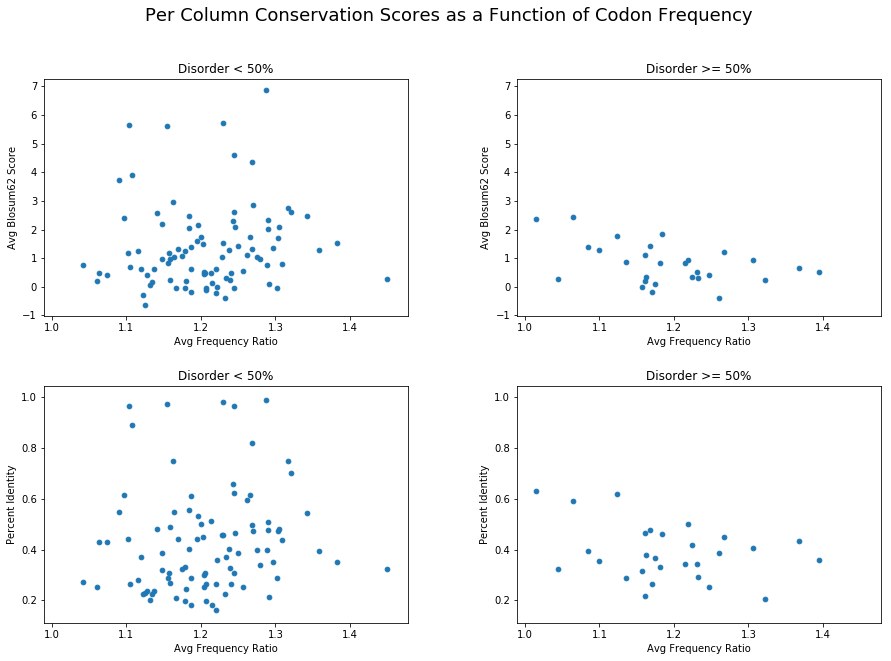

In [83]:
fig, ([ax1,ax2], [ax3,ax4]) = plt.subplots(2, 2, sharex=True, sharey ='row', figsize=(15,10), 
                                           subplot_kw={'xlabel':"Avg Frequency Ratio"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

# freq score
ax1.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


ax3.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# turn on axis tick labels even though axis is shared
for ax in fig.axes:
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)

fig.subplots_adjust(hspace=0.3, wspace=0.3);

In [ ]:
# log odds here

any diff seen in scores here either?

Split at 50% Disorder Strength doesnt change anything as expected since vsl2 splits at 50% strength for labeling disorder or order

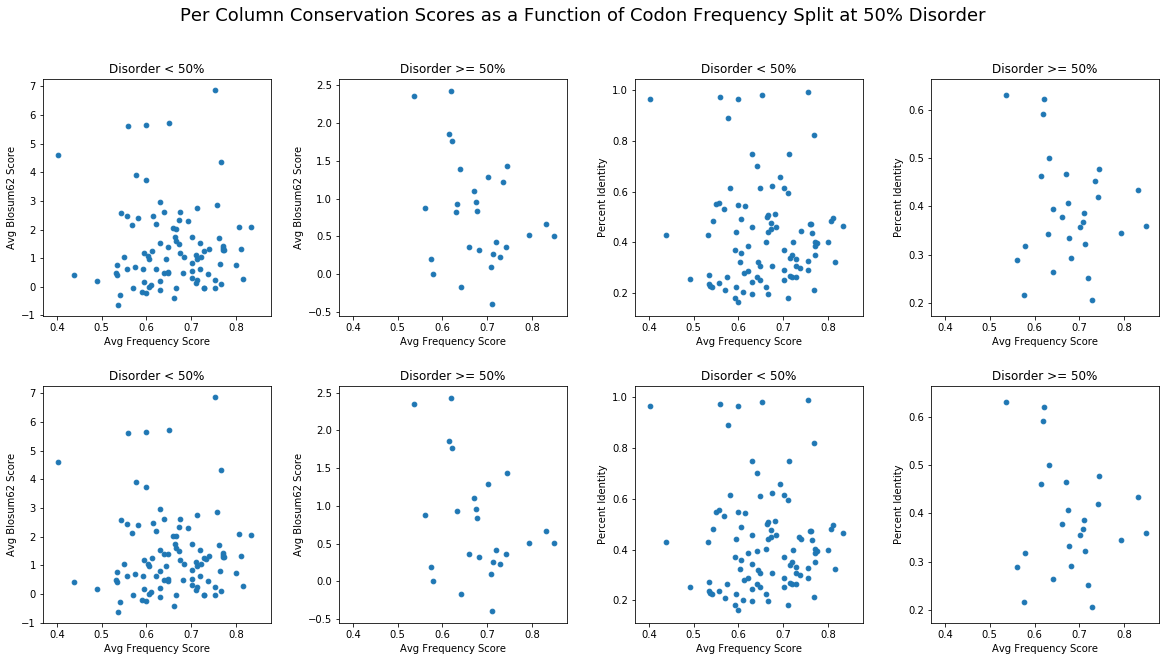

In [149]:
df_clean_dis3 = df_clean[df_clean['Avg Disorder Strength'] < 0.5]
df_clean_dis4 = df_clean[df_clean['Avg Disorder Strength'] >= 0.5]

fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8]) = plt.subplots(2, 4, sharex='row', figsize=(20,10), 
                                                           subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency Split at 50% Disorder", fontsize=18)

# Fraction Disorder
ax1.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax3.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# Disorder Strength
ax5.scatter(df_clean_dis3['Avg Frequency Score'], df_clean_dis3['Avg Blosum62 Score'], s=22)
ax5.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis4['Avg Frequency Score'], df_clean_dis4['Avg Blosum62 Score'], s=22)
ax6.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax7.scatter(df_clean_dis3['Avg Frequency Score'], df_clean_dis3['Percent Identity'], s=22)
ax7.set(ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis4['Avg Frequency Score'], df_clean_dis4['Percent Identity'], s=22)
ax8.set(ylabel='Percent Identity', title='Disorder >= 50%')


fig.subplots_adjust(hspace=0.3, wspace=0.3);

Attempting to filter by fraction aligned produced no differences (maybe shrink size of window)

In [39]:
print(min(df_clean['Fraction Aligned']))

0.7217391304347827


In [40]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio


In [41]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio


In [42]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio
637,V,0.630952,2.354274,0.535714,0.730435,0.988095,0.809245,1.014837
1524,L,0.406977,0.952941,0.674419,0.747826,0.837209,0.616585,1.305469
1601,x,0.385542,-0.398472,0.710843,0.721739,1.000000,0.801928,1.260474


In [43]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio
638,T,0.344828,0.511361,0.793103,0.756522,0.988506,0.773630,1.231490
647,V,0.367925,0.090925,0.707547,0.921739,0.990566,0.789183,1.174391
648,E,0.377358,0.356155,0.660377,0.921739,1.000000,0.773554,1.163139
649,T,0.216981,0.192992,0.575472,0.921739,0.971698,0.728493,1.160834
650,E,0.264151,-0.171249,0.641509,0.921739,0.952830,0.679067,1.169929
651,E,0.289720,0.876565,0.560748,0.930435,0.906542,0.648846,1.135412
652,N,0.252336,0.420384,0.719626,0.930435,0.831776,0.594928,1.247330
653,S,0.317757,0.002292,0.579439,0.930435,0.738318,0.564553,1.157200
654,K,0.205607,0.226944,0.728972,0.930435,0.616822,0.524306,1.321664
655,V,0.342342,0.816708,0.630631,0.965217,0.549550,0.496697,1.214185


## Distribution of Each Score Split at 50% Fraction Disorder

Not redoing with disorder strength since population changes were marginal compared to fraction disorder

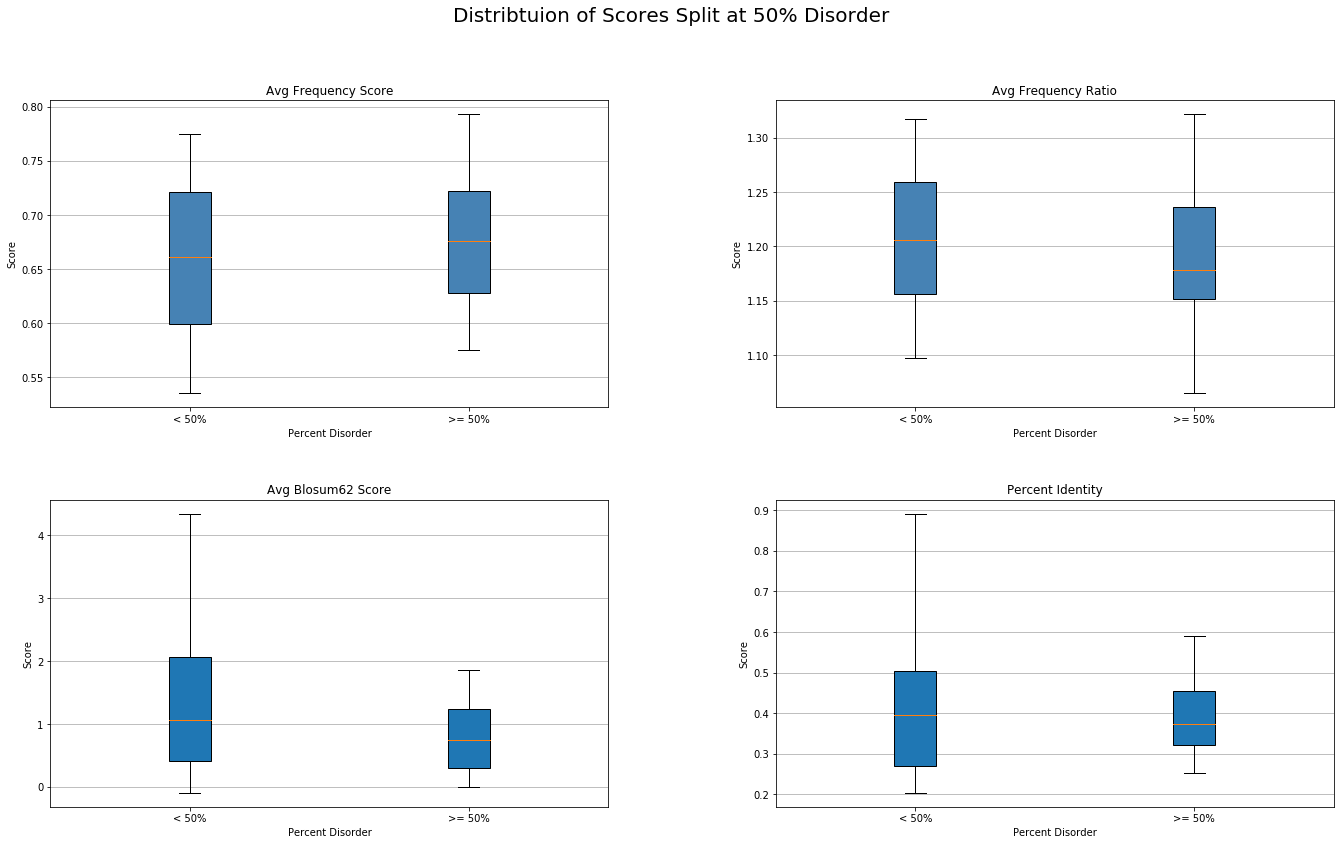

In [159]:
fig, ([ax1,ax2], [ax3,ax4]) = plt.subplots(2, 2, figsize=(23,13), subplot_kw={'xlabel':"Percent Disorder", 'ylabel': 'Score'})
fig.suptitle("Distribtuion of Scores Split at 50% Disorder", fontsize=20)

color = "steelblue"
ax1.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax1.set(title="Avg Frequency Score")

ax2.boxplot([df_clean_dis1["Avg Frequency Ratio"], df_clean_dis2["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax2.set(title="Avg Frequency Ratio")

ax3.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)
ax3.set(title="Avg Blosum62 Score")

ax4.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)
ax4.set(title="Percent Identity")


for ax in fig.axes:
    ax.set_xticklabels(["< 50%", ">= 50%"])   # wouldn't work in subplot_kw
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.grid(True, axis='y')
 
# try to get median values to place the number of obsv in box
'''
nobs = [len(df_clean_dis1), len(df_clean_dis2)]
nobs = ['n: ' + str(num) for num in nobs]
pos = range(len(nobs))
for ax in fig.axes:
    for tick,label in zip(pos, ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
        horizontalalignment='center', size='x-small', color='w', weight='semibold')    
'''   
    

fig.subplots_adjust(hspace=0.3, wspace=0.3);

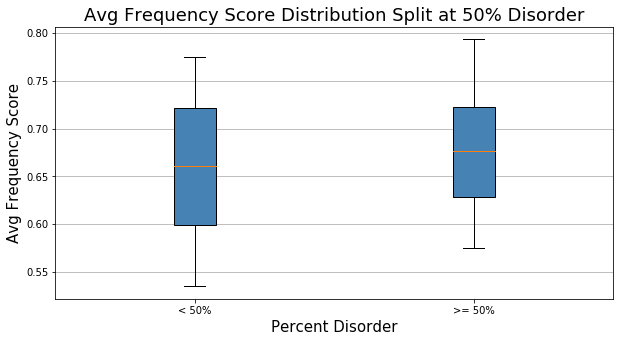

In [44]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2], ["< 50%", ">= 50%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split at 50% Disorder', fontsize=18);


Using Freq ratio (small drop in upper 50%, but still minor diff between the groups)

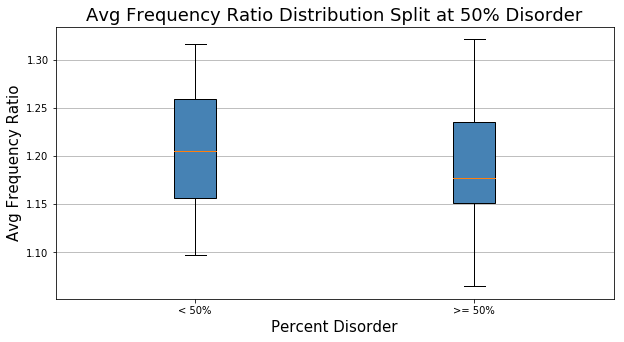

In [54]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_dis1["Avg Frequency Ratio"], df_clean_dis2["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2], ["< 50%", ">= 50%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Ratio", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Ratio Distribution Split at 50% Disorder', fontsize=18);


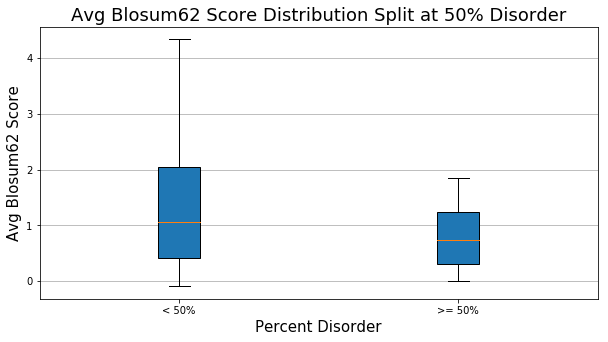

In [22]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Avg Blosum62 Score', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split at 50% Disorder', fontsize=18);

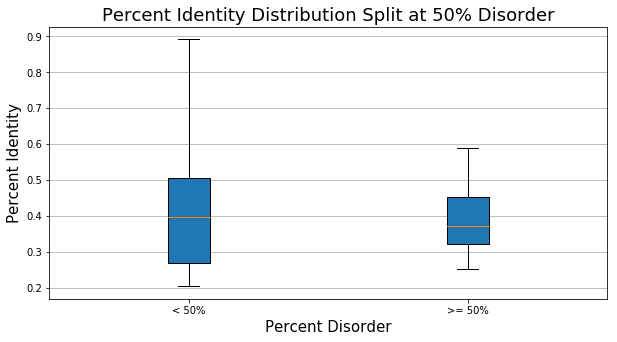

In [157]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Percent Identity', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split at 50% Disorder', fontsize=18);

## Plot Scores as a Function of Disorder

Very little change between Fraction Disorder and Avg Disorder Score

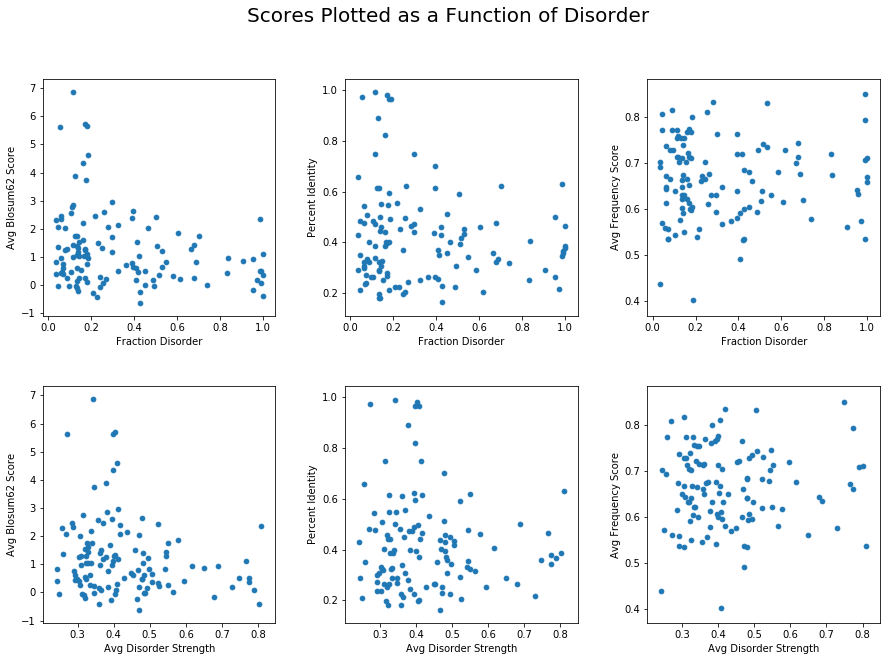

In [147]:
fig, ([ax1,ax2, ax3], [ax4,ax5,ax6]) = plt.subplots(2, 3, figsize=(15,10), sharex='row', sharey='col', subplot_kw={'xlabel':"Percent Disorder", 'ylabel': 'Score'})

fig.suptitle("Scores Plotted as a Function of Disorder", fontsize=20)

ax1.scatter(df_clean['Fraction Disordered'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set(xlabel='Fraction Disorder', ylabel='Avg Blosum62 Score')

ax2.scatter(df_clean['Fraction Disordered'], df_clean['Percent Identity'], s=22)
ax2.set(xlabel='Fraction Disorder', ylabel='Percent Identity')

ax3.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Score'], s=22)
ax3.set(xlabel='Fraction Disorder', ylabel='Avg Frequency Score')

ax4.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Blosum62 Score'], s=22)
ax4.set(xlabel='Avg Disorder Strength', ylabel='Avg Blosum62 Score')

ax5.scatter(df_clean['Avg Disorder Strength'], df_clean['Percent Identity'], s=22)
ax5.set(xlabel='Avg Disorder Strength', ylabel='Percent Identity')

ax6.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Score'], s=22)
ax6.set(xlabel='Avg Disorder Strength', ylabel='Avg Frequency Score')

 
fig.subplots_adjust(hspace=0.3, wspace=0.3);

## Fraction Disorder Filters

In [165]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
len(df_clean_25d)

64

In [166]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
len(df_clean_50d)

27

In [167]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
len(df_clean_75d)

15

In [168]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
len(df_clean_100d)

13

## Disorder Strength Filters

In [160]:
df_clean_25ds = df_clean[df_clean['Avg Disorder Strength'] <= 0.25]
len(df_clean_25ds)

3

In [161]:
df_clean_50ds = df_clean[(df_clean['Avg Disorder Strength'] <= 0.50) & (df_clean['Avg Disorder Strength'] > 0.25)]
len(df_clean_50ds)

91

In [162]:
df_clean_75ds = df_clean[(df_clean['Avg Disorder Strength'] <= 0.75) & (df_clean['Avg Disorder Strength'] > 0.50)]
len(df_clean_75ds)

19

In [163]:
df_clean_100ds = df_clean[(df_clean['Avg Disorder Strength'] <= 1.0) & (df_clean['Avg Disorder Strength'] > 0.75)]
len(df_clean_100ds)

6

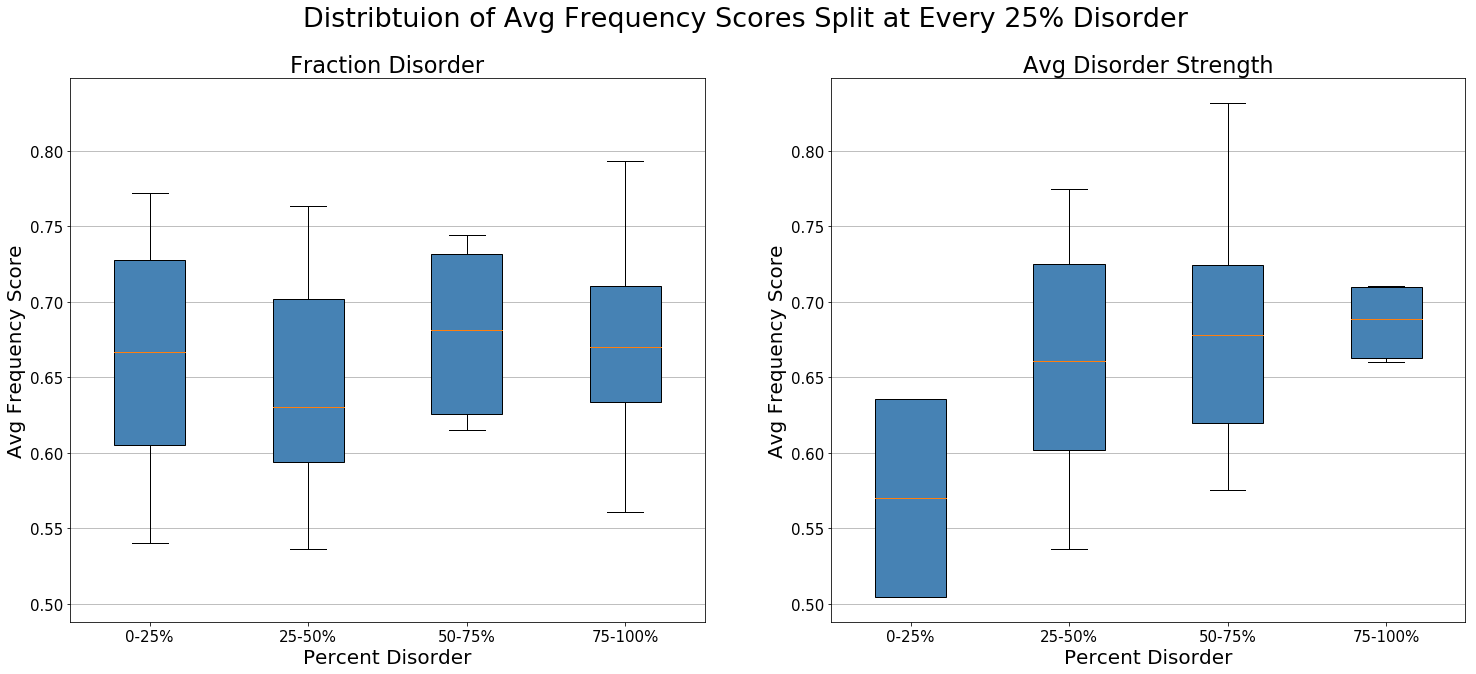

In [208]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10), sharey=True)
fig.suptitle("Distribtuion of Avg Frequency Scores Split at Every 25% Disorder", fontsize=27)
color = "steelblue"

ax1.boxplot([df_clean_25d["Avg Frequency Score"], df_clean_50d["Avg Frequency Score"], df_clean_75d["Avg Frequency Score"],
                       df_clean_100d["Avg Frequency Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))


ax2.boxplot([df_clean_25ds["Avg Frequency Score"], df_clean_50ds["Avg Frequency Score"], df_clean_75ds["Avg Frequency Score"],
                       df_clean_100ds["Avg Frequency Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

titles = ["Fraction Disorder", "Avg Disorder Strength"]
for i, ax in enumerate(fig.axes):
    ax.tick_params(labelsize=15)
    ax.set_xlabel("Percent Disorder", fontsize=20)
    ax.set_ylabel('Avg Frequency Score', fontsize=20)
    ax.set_title(titles[i], fontsize=22.5)
    ax.set_xticklabels(["0-25%","25-50%", "50-75%", "75-100%"])   # wouldn't work in subplot_kw
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.grid(True, axis='y');


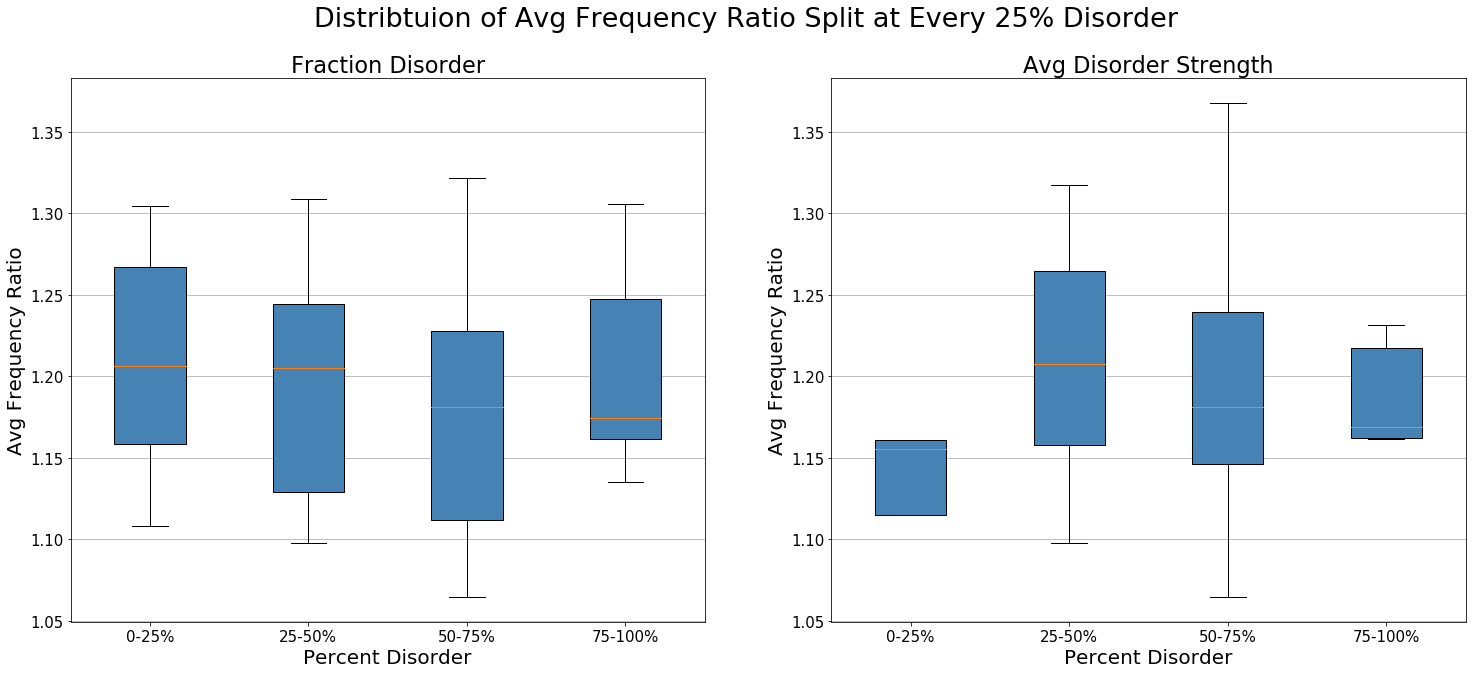

In [209]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10), sharey=True)
fig.suptitle("Distribtuion of Avg Frequency Ratio Split at Every 25% Disorder", fontsize=27)
color = "steelblue"

ax1.boxplot([df_clean_25d["Avg Frequency Ratio"], df_clean_50d["Avg Frequency Ratio"], df_clean_75d["Avg Frequency Ratio"],
                       df_clean_100d["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))


ax2.boxplot([df_clean_25ds["Avg Frequency Ratio"], df_clean_50ds["Avg Frequency Ratio"], df_clean_75ds["Avg Frequency Ratio"],
                       df_clean_100ds["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

titles = ["Fraction Disorder", "Avg Disorder Strength"]
for i, ax in enumerate(fig.axes):
    ax.tick_params(labelsize=15)
    ax.set_xlabel("Percent Disorder", fontsize=20)
    ax.set_ylabel('Avg Frequency Ratio', fontsize=20)
    ax.set_title(titles[i], fontsize=22.5)
    ax.set_xticklabels(["0-25%","25-50%", "50-75%", "75-100%"])   # wouldn't work in subplot_kw
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.grid(True, axis='y');


In [ ]:
# log odds here

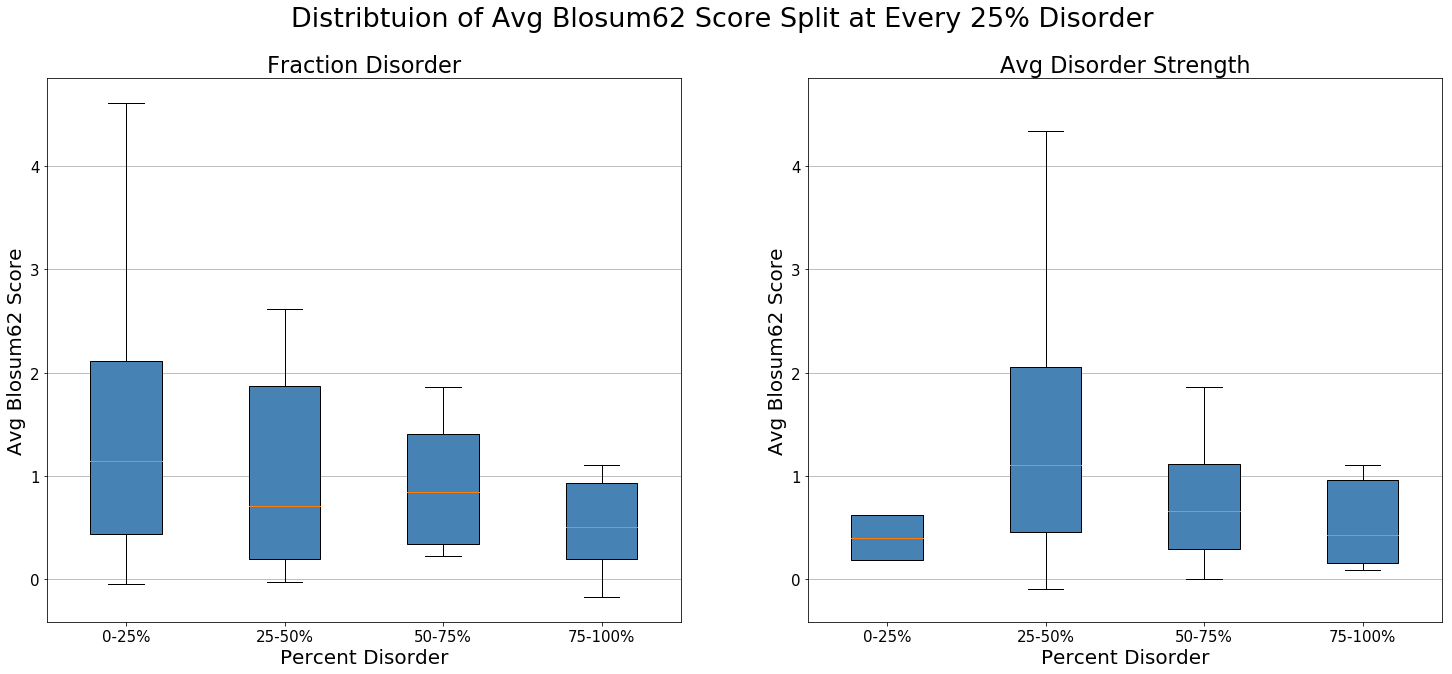

In [211]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10), sharey=True)
fig.suptitle("Distribtuion of Avg Blosum62 Score Split at Every 25% Disorder", fontsize=27)
color = "steelblue"

ax1.boxplot([df_clean_25d["Avg Blosum62 Score"], df_clean_50d["Avg Blosum62 Score"], df_clean_75d["Avg Blosum62 Score"],
                       df_clean_100d["Avg Blosum62 Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))


ax2.boxplot([df_clean_25ds["Avg Blosum62 Score"], df_clean_50ds["Avg Blosum62 Score"], df_clean_75ds["Avg Blosum62 Score"],
                       df_clean_100ds["Avg Blosum62 Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

titles = ["Fraction Disorder", "Avg Disorder Strength"]
for i, ax in enumerate(fig.axes):
    ax.tick_params(labelsize=15)
    ax.set_xlabel("Percent Disorder", fontsize=20)
    ax.set_ylabel('Avg Blosum62 Score', fontsize=20)
    ax.set_title(titles[i], fontsize=22.5)
    ax.set_xticklabels(["0-25%","25-50%", "50-75%", "75-100%"])   # wouldn't work in subplot_kw
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.grid(True, axis='y');


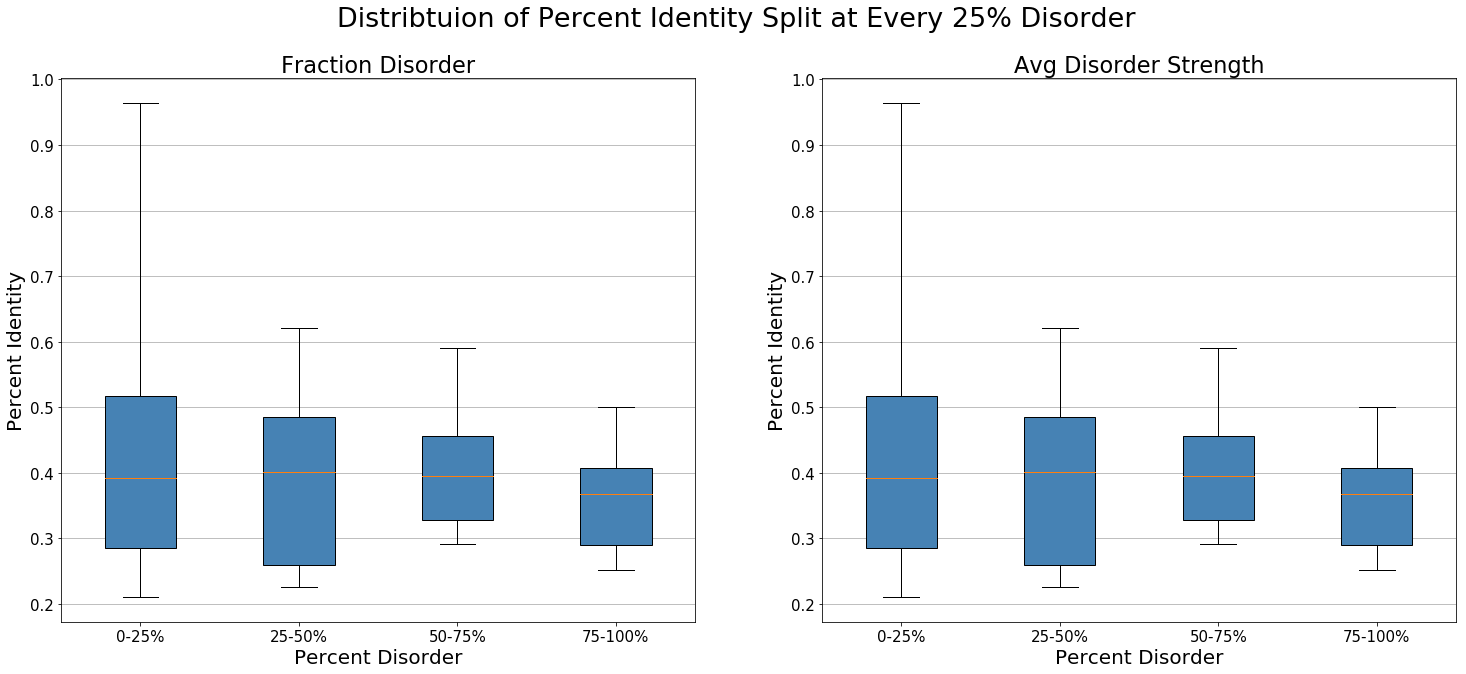

In [212]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10), sharey=True)
fig.suptitle("Distribtuion of Percent Identity Split at Every 25% Disorder", fontsize=27)
color = "steelblue"

ax1.boxplot([df_clean_25d["Percent Identity"], df_clean_50d["Percent Identity"], df_clean_75d["Percent Identity"],
                       df_clean_100d["Percent Identity"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))


ax2.boxplot([df_clean_25d["Percent Identity"], df_clean_50d["Percent Identity"], df_clean_75d["Percent Identity"],
                       df_clean_100d["Percent Identity"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

titles = ["Fraction Disorder", "Avg Disorder Strength"]
for i, ax in enumerate(fig.axes):
    ax.tick_params(labelsize=15)
    ax.set_xlabel("Percent Disorder", fontsize=20)
    ax.set_ylabel('Percent Identity', fontsize=20)
    ax.set_title(titles[i], fontsize=22.5)
    ax.set_xticklabels(["0-25%","25-50%", "50-75%", "75-100%"])   # wouldn't work in subplot_kw
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.grid(True, axis='y');
